In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.preprocessing import image

In [2]:
model = inception_v3.InceptionV3(weights='imagenet')

W0913 20:58:37.875110  3568 deprecation.py:506] From C:\Users\PAWN SHOP\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
 model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

average_pooling2d_1 (AveragePoo (None, 35, 35, 256)  0           mixed0[0][0]                     
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 35, 35, 64)   16384       mixed0[0][0]                     
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 35, 35, 64)   76800       activation_13[0][0]              
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 35, 35, 96)   82944       activation_16[0][0]              
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 35, 35, 64)   16384       average_pooling2d_1[0][0]        
__________________________________________________________________________________________________
batch_norm

                                                                 activation_68[0][0]              
                                                                 activation_69[0][0]              
__________________________________________________________________________________________________
conv2d_72 (Conv2D)              (None, 17, 17, 192)  147456      mixed7[0][0]                     
__________________________________________________________________________________________________
batch_normalization_72 (BatchNo (None, 17, 17, 192)  576         conv2d_72[0][0]                  
__________________________________________________________________________________________________
activation_72 (Activation)      (None, 17, 17, 192)  0           batch_normalization_72[0][0]     
__________________________________________________________________________________________________
conv2d_73 (Conv2D)              (None, 17, 17, 192)  258048      activation_72[0][0]              
__________

In [4]:
im = Image.open('phone.jpg')

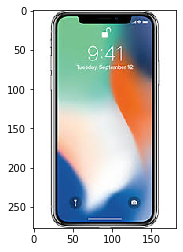

In [5]:
plt.imshow(im)

In [6]:
img = image.load_img('phone.jpg', target_size=(299,299))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = inception_v3.preprocess_input(img)
prediction = model.predict(img)
labels = inception_v3.decode_predictions(prediction, top=3) [0]
labels

[('n02992529', 'cellular_telephone', 0.7054384),
 ('n03584254', 'iPod', 0.20640343),
 ('n03485407', 'hand-held_computer', 0.015740922)]

In [ ]:
img.shape

In [ ]:
import time
camera = cv2.VideoCapture(0)
camera_height = 500

while True:
    check, frame = camera.read()
    
    #flip the frame
    frame = cv2.flip(frame, 1)
    
    #rescaling camera output 
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect + camera_height) #landscape orientation - wide range
    frame = cv2.resize(frame, (res, camera_height))
    
    #add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (240,100,0),2)
    

     #get roi
    roi = frame[75+2:425-2, 300+2: 650-2]

     #parse bgr to rgb
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)

    #resize to 224 224
    roi = cv2.resize(roi, (299,299))
    roi = inception_v3.preprocess_input(roi)

    #predict = 
    roi2 = np.array([cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)])

    prediction = model.predict(roi2)
    
    labels = inception_v3.decode_predictions(prediction, top=3)[0]

    #add text\n",
    label_1 = '{} - {}%'.format(labels[0][1], int(labels[0][2] * 100))

    cv2.putText(frame, label_1,(70, 170), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20,240,240), 2)
    
    #show the frame
    cv2.imshow("Real time object detection", frame)

    key = cv2.waitKey(1)
    
    #quit camera if 'q' is pressed
    if key & 0xFF == ord('q'):
       break
camera.release()
cv2.destroyAllwindows()